In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**THE CHALLENGE**

Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 grayscale images. There is a training set of 60,000 images and 10,000 test images.

Label    Description

0        T-shirt/top

1        Trouser

2        Pullover

3        Dress

4        Coat

5        Sandal

6        Shirt

7        Sneaker

8        Bag

9        Ankle boot

# Importing Datasets and libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**VISUALIZING DATA**

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

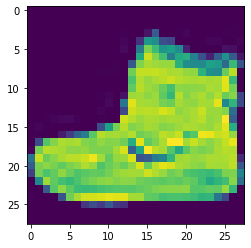

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train[0]

9

# Processing the data

In [6]:
X_train.max()

255

In [7]:
X_train = X_train/255
X_test = X_test/255

Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

Convert the y_train and y_test values to be one-hot encoded for categorical analysis by keras

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

**Building the Model**

TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):

2D Convolutional Layer, filters=32 and kernel_size=(4,4)

Pooling Layer where pool_size = (2,2)

Flatten Layer

Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

Final Dense Layer of 10 Neurons with a softmax activation

Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [14]:
model = Sequential()

#Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu',))
#POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

#FLATTEN IMAGES FROM 28 BY 28 TO 764 BEFORE FINAL LAYER
model.add(Flatten())

#128 NEURONS IN DENSE HIDDEN LAYER 
model.add(Dense(128, activation='relu'))

#LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
             optimizer='rmsprop',
             metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


## TRAINING MODEL

In [16]:
model.fit(X_train, y_cat_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 2ms/step - loss: 0.5419 - accuracy: 0.8115
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2882 - accuracy: 0.8970
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2344 - accuracy: 0.9153
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2124 - accuracy: 0.9229
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1929 - accuracy: 0.9324
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1815 - accuracy: 0.9359
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1664 - accuracy: 0.9416
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1590 - accuracy: 0.9438
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1470 - accuracy: 0.9480
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.13

## EVALUATING THE MODEL

In [17]:
model.metrics_names

['loss', 'accuracy']

In [18]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4962 - accuracy: 0.9017


[0.4962289035320282, 0.9017000198364258]

In [19]:
from sklearn.metrics import classification_report

In [22]:
pred = model.predict(X_test)
predictions = np.argmax(pred, axis=1)

In [23]:
y_cat_test.shape

(10000, 10)

In [25]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [26]:
predictions[0]

9

In [27]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.83      0.84      1000
           3       0.92      0.89      0.91      1000
           4       0.80      0.89      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.65      0.71      1000
           7       0.93      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.99      0.94      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

